In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:

data_raw=load_iris()

data_x=data_raw['data'][:100]
data_y=data_raw['target'][:100]

data_all=pd.DataFrame(data_x)
data_all['target']=data_y

test_data=data_all.sample(frac=0.2)

train_data=data_all.drop(test_data.index)

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}}$$

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}}{(1+e^{x})^{2}}}=f(x)(1-f(x))}
$$

In [3]:
def sigmoid(x,deri=False):
    x=np.array(x,dtype=np.float128)
    if deri==False:
        
        return np.array(1/(1+np.exp(-x)),dtype=np.float128)
    elif deri==True:
        return np.array(x*(1-x),dtype=np.float128)
    else:
        print('input error')

In [4]:
X=train_data.iloc[:,0:4]
X=X.T.as_matrix()
Y=train_data.iloc[:,4]
Y=Y.T.as_matrix().reshape(1,-1)

In [5]:
X_test=test_data.iloc[:,0:4]
X_test=X_test.T.as_matrix()
Y_test=test_data.iloc[:,4]
Y_test=Y_test.as_matrix().reshape(1,-1)

# Net shape: data dimention of  each layer =[4,5,2,1]
 
X.shape=(4,80)

$ Z^{[1]}=W^{[1]}X+B^{[1]}   \\
A^{[1]}=sigmoid(Z^{[1]})   \\
Z^{[2]}=W^{[2]}X+B^{[2]}   \\
A^{[2]}=sigmoid(Z^{[2]})  
$

 

## layer 0 =data input

In [6]:
X.shape

(4, 80)

In [7]:
Y.shape

(1, 80)

In [8]:
def cost(AL,Y):
    m=Y.shape[1]
    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return   cost



In [9]:

W1=10*0.001*np.random.rand(5,4)
B1=np.zeros(shape=(W1.shape[0],1))
W2=10*0.001*np.random.rand(2,5)
B2=np.zeros(shape=(W2.shape[0],1))
W3=10*0.001*np.random.rand(1,2)
B3=np.zeros(shape=(W3.shape[0],1))






In [10]:
cost_list=[]
iterations=[]
 

In [11]:
iteration_number=10000000
for i in range(iteration_number):

    # forward

    learning_rate=0.0025*1

    Z1=W1.dot(X)+B1   
    A1=sigmoid(Z1)
    A1=np.array(A1,dtype=np.float128)

    Z2=W2.dot(A1)+B2
    A2=sigmoid(Z2)
    A2=np.array(A2,dtype=np.float128)

    Z3=W3.dot(A2)+B3
    A3=sigmoid(Z3)
    A3=np.array(A3,dtype=np.float128)


    dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3))
    dA3=np.array(dA3,dtype=np.float128)

    if i %(iteration_number/100)==0:

        cost_list.append(cost(A3,Y))
        iterations.append(i)
        try:
            print(cost_list[-1]/cost_list[-2],'    ',cost_list[-1])
        except:
            print(cost_list[-1])

        
        
        
    # backforward




    m=Y.shape[1]
    

    dW3=(1/m)*(dA3*sigmoid(Z3,deri=True)).dot(A2.T )

    dZ3=dA3*sigmoid(Z3,deri=True)

    dB3=(1/m)*np.sum(dZ3,axis=1,keepdims=True)


    dA2=W3.T.dot(dZ3)

    dZ2=dA2*sigmoid(Z2,deri=True)

    dW2=(1/m)*dZ2.dot(A1.T)

    dB2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)

    dA1=W2.T.dot(dZ2)
    dZ1=dA1*sigmoid(Z1,deri=True)

    A0=X

    dW1=(1/m)*dZ1.dot(A0.T)

    dB1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)



    W1+=-learning_rate* dW1
    B1+=-learning_rate* dB1
    W2+=-learning_rate* dW2
    B2+=-learning_rate* dB2
    W3+=-learning_rate* dW3
    B3+=-learning_rate* dB3


0.693150950185
0.999995084361      0.693147542906
0.999999625703      0.693147283463
0.999999898489      0.6931472131
0.99999995889      0.693147184605
0.999999979676      0.693147170518
0.999999988716      0.693147162696
0.99999999326      0.693147158025
0.999999995777      0.693147155098
0.999999997266      0.693147153203
0.999999998188      0.693147151947
0.999999998778      0.6931471511
0.999999999164      0.693147150521
0.99999999942      0.693147150119
0.999999999592      0.693147149836
0.999999999708      0.693147149634
0.999999999787      0.693147149487
0.999999999841      0.693147149377
0.999999999878      0.693147149292
0.999999999903      0.693147149225
0.99999999992      0.69314714917
0.999999999932      0.693147149123
0.99999999994      0.693147149082
0.999999999946      0.693147149044
0.99999999995      0.693147149009
0.999999999952      0.693147148976
0.999999999954      0.693147148944
0.999999999955      0.693147148913


KeyboardInterrupt: 

In [12]:
cost_list

[0.69315095018528356319,
 0.69314754290562019832,
 0.69314728346257640043,
 0.69314721310024452079,
 0.69314718460516097875,
 0.69314717051781129072,
 0.69314716269605767721,
 0.69314715802458861873,
 0.69314715509752728725,
 0.69314715320251911397,
 0.69314715194683079556,
 0.69314715110004733825,
 0.6931471505206683166,
 0.69314715011886522417,
 0.6931471498362388037,
 0.69314714963417671111,
 0.69314714948684554762,
 0.6931471493768190153,
 0.69314714929227523506,
 0.69314714922516326695,
 0.69314714916998590232,
 0.69314714912298306515,
 0.693147149081579921,
 0.69314714904401197382,
 0.69314714900906949772,
 0.69314714897592290309,
 0.69314714894400321739,
 0.69314714891292020157]

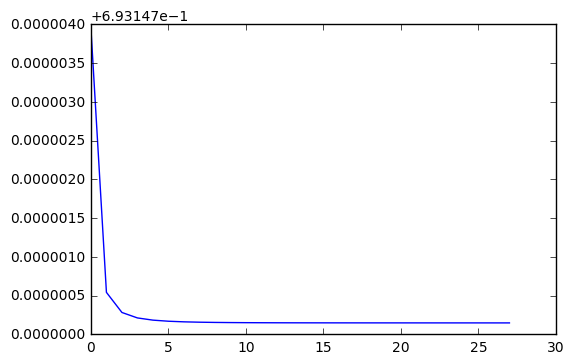

In [13]:
plt.plot(cost_list)

#show plot
plt.show()

In [14]:
Y_test.shape

(1, 20)

In [15]:
cost_list

[0.69315095018528356319,
 0.69314754290562019832,
 0.69314728346257640043,
 0.69314721310024452079,
 0.69314718460516097875,
 0.69314717051781129072,
 0.69314716269605767721,
 0.69314715802458861873,
 0.69314715509752728725,
 0.69314715320251911397,
 0.69314715194683079556,
 0.69314715110004733825,
 0.6931471505206683166,
 0.69314715011886522417,
 0.6931471498362388037,
 0.69314714963417671111,
 0.69314714948684554762,
 0.6931471493768190153,
 0.69314714929227523506,
 0.69314714922516326695,
 0.69314714916998590232,
 0.69314714912298306515,
 0.693147149081579921,
 0.69314714904401197382,
 0.69314714900906949772,
 0.69314714897592290309,
 0.69314714894400321739,
 0.69314714891292020157]

In [16]:
Z1=W1.dot(X_test)+B1   
A1=sigmoid(Z1)

Z2=W2.dot(A1)+B2
A2=sigmoid(Z2)

Z3=W3.dot(A2)+B3
A3=sigmoid(Z3)

cost(A3,Y_test)

0.69314714832979830569